In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"../data/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Axes: >

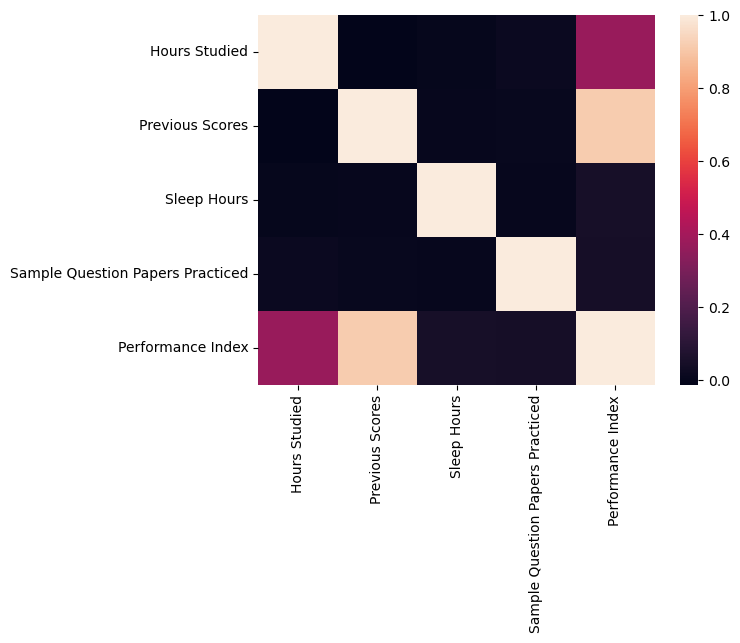

In [3]:
sns.heatmap(df.corr(numeric_only=True))

In [4]:
df.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


<Axes: >

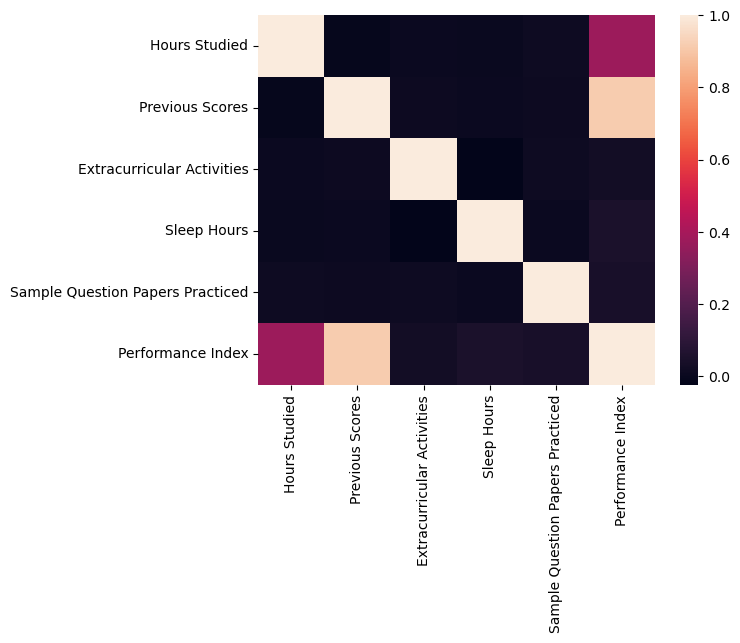

In [7]:
sns.heatmap(df.corr(numeric_only=True))

In [8]:
df.corr(numeric_only=True)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


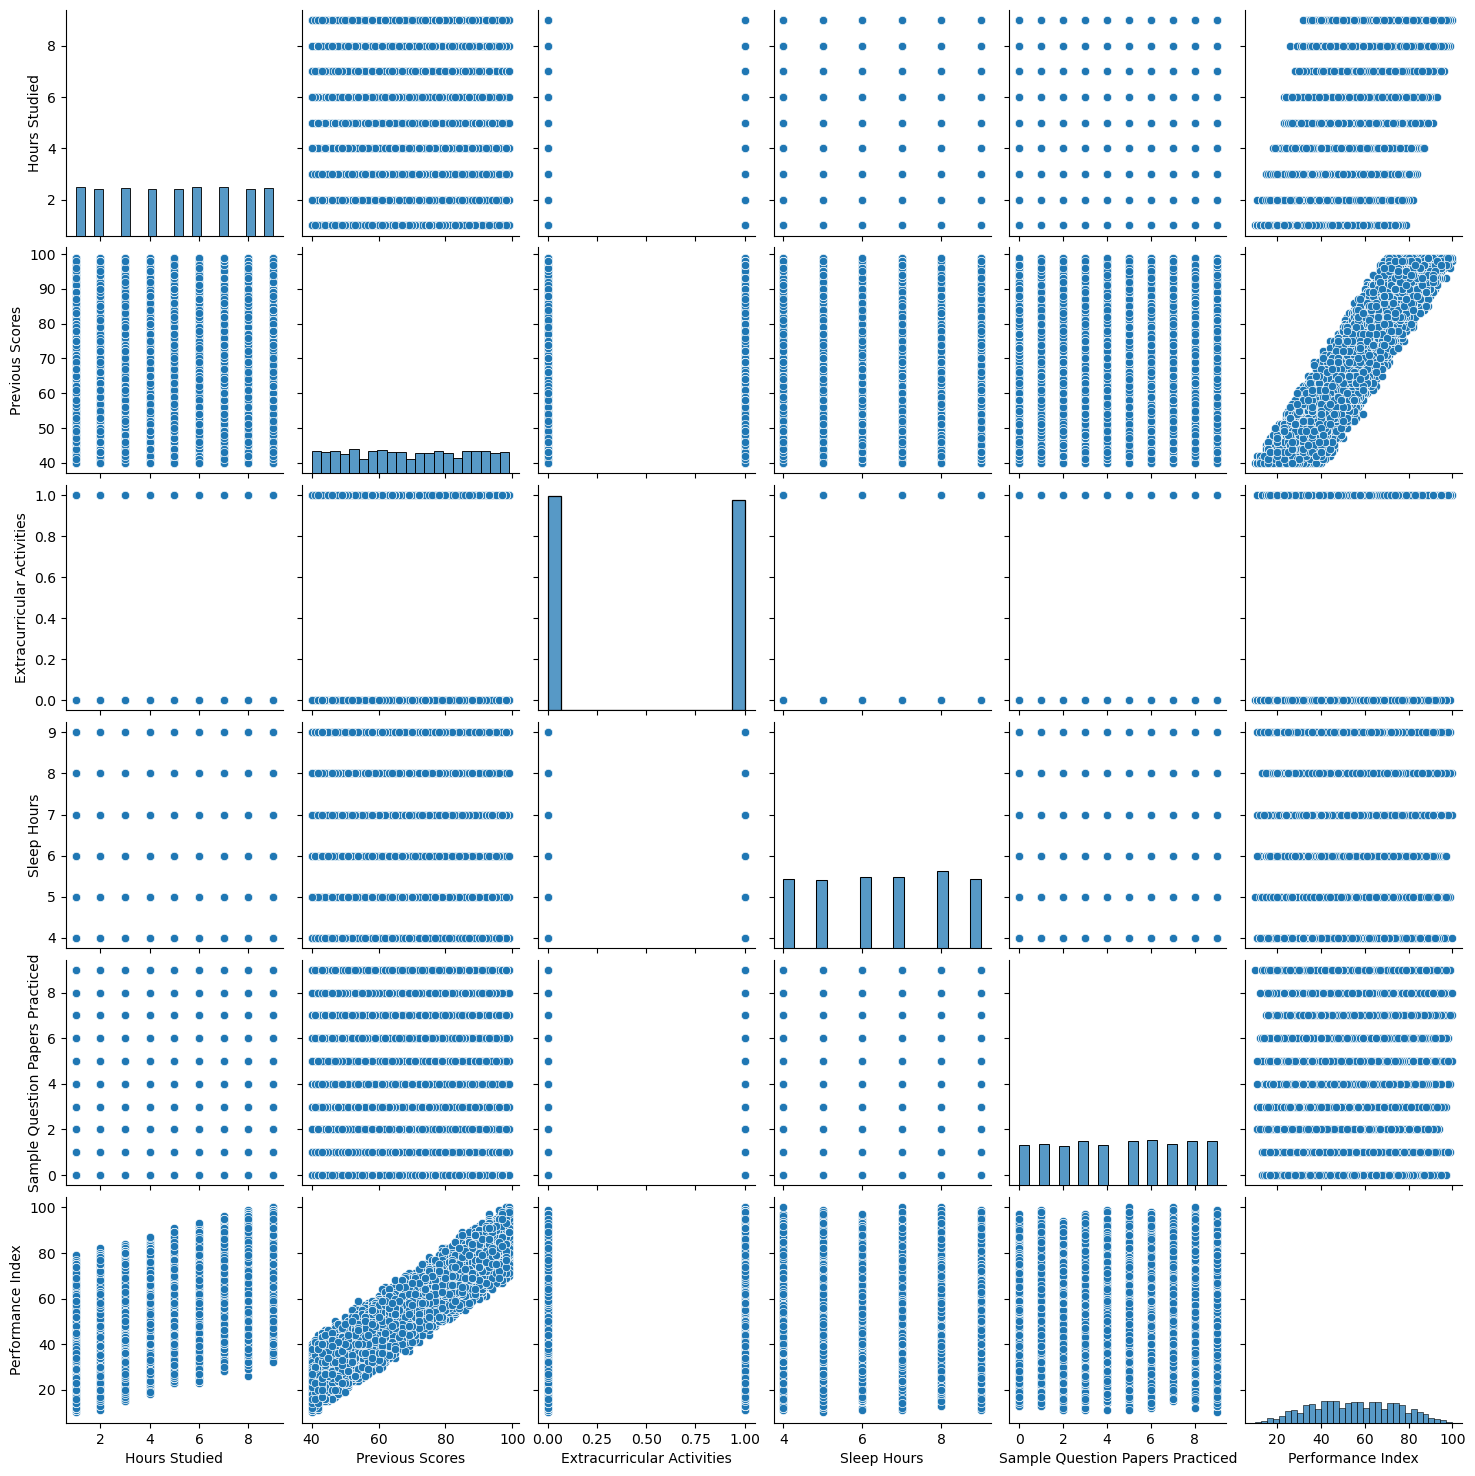

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split

# train test split
X = df.drop(columns=['Performance Index'],axis=1)
y = df['Performance Index']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [12]:
X_train_scaled

array([[-0.00753038, -0.89986849,  1.01325574, -0.31359842, -0.91258658],
       [-0.00753038,  0.02628177,  1.01325574, -1.48938781,  0.48532048],
       [-0.39373129, -0.32102458, -0.98691768,  0.27429627, -1.61154011],
       ...,
       [ 1.15107235, -1.71024997,  1.01325574, -0.90149312, -1.26206335],
       [ 1.15107235,  1.41550716, -0.98691768, -0.31359842,  1.53375078],
       [ 1.15107235,  0.95243203, -0.98691768, -1.48938781, -0.21363305]])

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test_scaled)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error:  4.2901695600879
Mean Absolute Error: 1.6365593530184013
R2 Score:  0.9887528968542207
Root mean squared error:  2.071272449507283


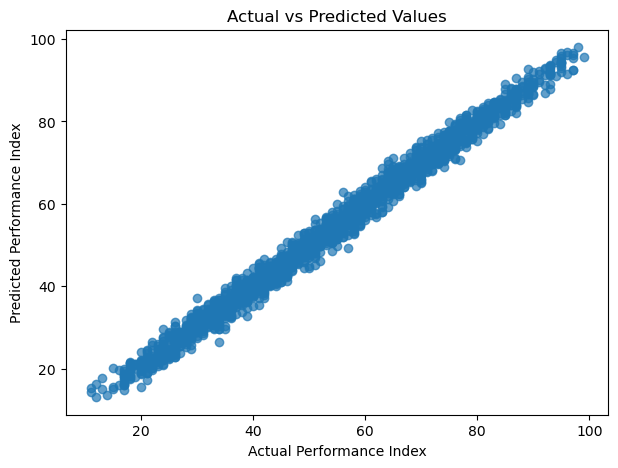

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Values")
plt.show()

In [28]:
lr.predict(sc.transform([[5, 100, 0, 5, 8]]))

/home/sans/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([85.99115241])

In [20]:
print("Cooefficient:", lr.coef_)
print("Intercept:", lr.intercept_)

Cooefficient: [ 7.37010518 17.58811976  0.30810742  0.80623579  0.56399986]
Intercept: 55.40503925044315
